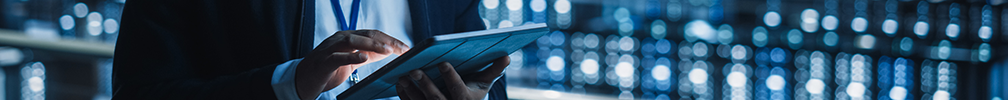

# Week 5 Overview
How can we ensure that a machine learning model doesn’t just fit the training data but also balances complexity to avoid overfitting or underfitting? Imagine a model designed to predict stock prices: with too many features, it might pick up random market fluctuations, but with too few, it may miss important trends. In both cases, the model will struggle to make reliable predictions. The key to building effective models lies in **selecting the right features** and using **regularization** to control model complexity, ensuring it will generalize to new data.

Last week, we explored the concept of **generalization**, focusing on how models perform on out-of-sample data. We discussed training, validation, and testing sets and the use of cross-validation to provide feedback during training to refine the model while leaving the test set for a final evaluation step. 

This week, we’ll dive deeper into model improvement techniques by exploring **model selection** strategies, such as **forward** and **backward selection**, which help identify the most relevant predictors and provide insights into your data. We’ll also introduce **regularization** methods, such as **ridge** and **lasso** regression, that prevent overfitting by constraining the model's complexity. By the end of this week, you'll know when to apply each method and how to tune them effectively, preparing for more advanced topics in the weeks ahead.

## Key Terms
- **Forward Selection**: A model selection technique that starts with no predictors and iteratively adds the most significant predictor at each step, improving the model’s performance
- **Backward Selection**: A model selection technique that starts with all predictors and iteratively removes the least significant predictor at each step, simplifying the model while maintaining performance.
- **Regularization:** A technique used to prevent overfitting by adding a penalty to the model’s complexity, encouraging simpler models that generalize better to unseen data
- **Cost Function:** A mathematical function that quantifies how well a machine learning model’s predictions match the actual data. It measures the overall "cost" or penalty of incorrect predictions and is used to guide the model's training process by minimizing this cost
- **Ridge Regression (L2 Regularization):** A type of regularization that adds a penalty proportional to the sum of the squared values of the coefficients, helping to prevent overfitting by shrinking large coefficients
- **Lasso Regression (L1 Regularization):** A regularization method that adds a penalty proportional to the absolute values of the coefficients, which can shrink some coefficients to zero, effectively selecting features
- **Elastic Nets:** A combination of **ridge** and **lasso** regression that balances between L1 and L2 penalties, providing a more flexible regularization approach that can handle correlated features

### Learning Objectives
By the end of this week, you should be able to:
- Explain the motivation for forward and backward selection methods and how each works
- Define regularization and its role in regression in preventing overfitting
- Differentiate between L1 (Lasso) and L2 (Ridge) regularization
- Apply each of the methods in scikit-learn
- Determine when to use each method in practice and how to tune the regularization parameters

## 5.1 Lesson: Feature Selection

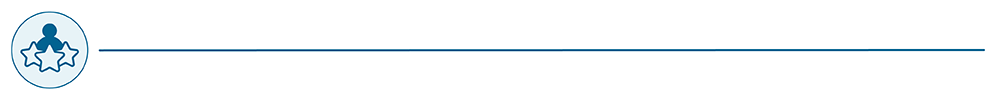

The regression techniques we’ve studied so far do not address a significant issue in balancing model complexity and testing accuracy: not all features in $X$ are equally significant in determining the output $Y$. 

Examining the role of individual features can provide good insights into our data. In the advertising dataset presented in Chapter 2 of ISL, there are three features–TV, Radio, and Newspaper spending–which are separately regressed onto Sales:

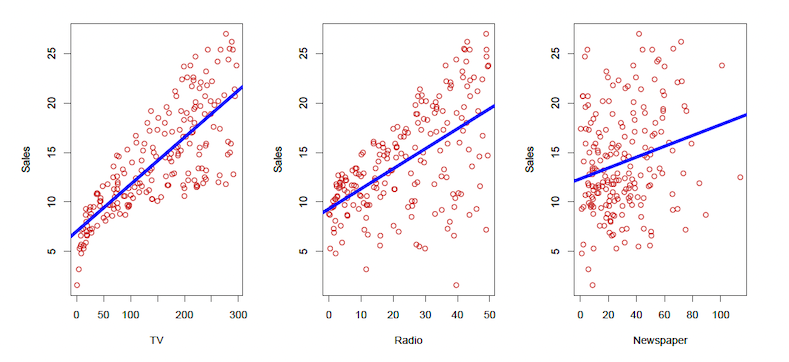

Clearly, TV spending has a stronger linear relationship with Sales than Newspaper spending. Should the Newspaper Spending feature be left out of our model?
___

### A Naive Solution
The first thing we might think of is to try every possible combination of features:
1. For every possible non-empty subset of features, train a regression model;
2. Compute the **CV Score** for each model;
3. Pick the model with the smallest score.

**Why is this Naive?** While this method guarantees finding the most accurate combination of features, it is computationally expensive. The number of possible subsets grows exponentially with the number of features ($2n-1$), making it impractical for datasets with many features. As a result, exhaustive search is only feasible for very small datasets.

___

### Feature Selection
Instead of using an exponential, brute-force approach, a better method is to iteratively add features (starting with the empty set) or remove features (starting with all features). This method can potentially apply to any model and any evaluation function, but let’s assume we are using least-squares regression and have performed an appropriate test-train split.

**Forward Selection** is a step wise approach that begins with no features and iteratively adds the most significant ones.
1. **Start with no features:** Initially, the model includes no predictors (features)
2. **Iteratively add features:**
    1. At each step, try adding the remaining features one by one and calculate the **CV score** for each new model.
    2. Add the feature tha tresults in the lowest score
3. **Repeat Step 2** until:
    3. Adding more features no longer results in a significant improvement in the **CV Score**, or
    4. A pre-specified number of features is reached
4. **Evaluate the final model:** After selecting the features, rport the **test MSE** to assess how well the model generalizes to new, unseen data.

Alternatively, we can go in the other direction!

**Backward Selection** is a stepwise approach that begins with all features and iteratively removes the least significant ones.

1. **Start with all features:** Initially, the model includes every available predictor (feature).
2. **Iteratively remove features:**
    1. At each step, try removing each remaining feature one by one and calculate the **CV score** for each model
    2. Remove the feature that results in the lowest **score** after being removed
3. **Repeat Step 2 until:**
    3. Removing more features no longer results in a significant improvement in the CV score or
    4. A pre-specified number of features is reached
4. **Evaluate the final model:** After selecting the final set of features, report the **test MSE** to assess how well the model generalizes to unseen data.

Both of these methods search through the collection of all subsets of features in a greedy fashion, which is computationally efficient compared to trying all possible combinations of features and often provides a good trade-off between performance and simplicity. Unfortunately, there is the standard efficiency/accuracy tradeoff, and the greedy algorithms (which never backtrack to reconsider its choices) may not produce optimal results. Essentially, instead of trying all sets of features, you are exploring paths through a graph using a greedy strategy, shown here for the Advertising dataset:

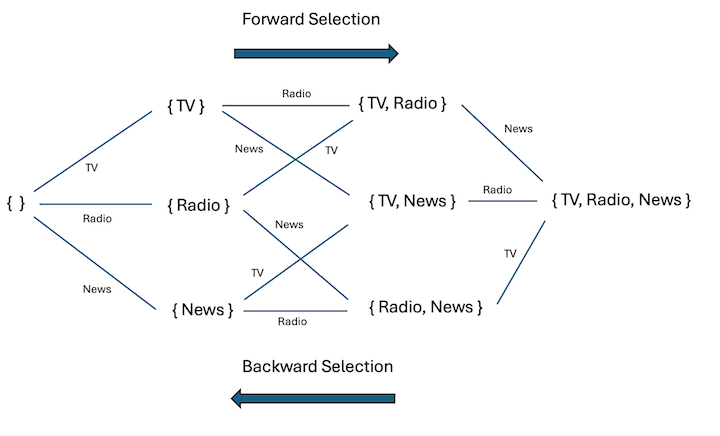

**Conclusion and Caveats:** Feature selection is a powerful technique, but it comes with an important caveat: 

There is a strong assumption hidden in the details: **Uncorrelated features** are important for forward and backward selection to work effectively. **Correlation** only measures linear relationships between features, which is particularly relevant in regression models. If features are highly correlated, the algorithm may misjudge their importance because they share similar information. This can lead to the wrong features being added or removed, resulting in a less accurate model.

This is where **regularization techniques** come in. Unlike forward or backward selection, regularization methods handle correlated features more effectively by applying penalties to the model's 
complexity. This reduces the risk of overfitting and allows the model to manage correlations without relying on the assumption that features must be uncorrelated. 

___

### Think About It
- Think about why reducing the number of features can be beneficial. How might using too many features affect model performance, especially in terms of overfitting and interpretability?
- Forward selection adds features one by one, while backward selection starts with all features and removes them. In what situations might one method be preferable to the other?
- Does reducing the number of features make a model simpler? How might this impact interpretability and model performance?


## 5.2 Lesson: Regularization with Ridge and Lasso Regression Models

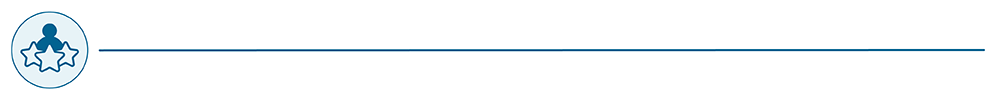

Now suppose you're working on a predictive model to estimate housing prices. You have many features to consider: square footage, number of bedrooms, neighborhood quality, and more. Your first attempt at a multiple regression model performs poorly on its test set.

At first, you might think that feature selection could help by removing some features, but what if important predictors like square footage and the number of bedrooms are highly correlated? Removing one could reduce the model's ability to capture essential information.

An alternative approach is **regularization**, a technique used to prevent overfitting by adding a penalty to the model's complexity, rewarding simpler models that generalize better to new data. Instead of removing features, regularization adjusts the magnitude of the coefficients, controlling how much influence each feature has on the predictions. We can think of it as a more refined version of feature selection: instead of the binary decision of including a feature or not, we adjust each feature’s contribution to the model by shrinking its coefficient.

In models with regularization, we need a more flexible metric than simple error measurements like MSE. A **cost function** quantifies how well a model’s predictions match the actual data, measuring the overall 'cost' or penalty of incorrect predictions. By minimizing this cost, we guide the model’s training process.

While errors like MSE capture the prediction accuracy, a cost function can also incorporate other factors, such as regularization, to optimize the model, balancing both accuracy and complexity.

We’ll look at two common regularization techniques, **ridge** and **lasso regression**. 

### Ridge Regression
Ridge Regression is a type of linear regression that includes a regularization term to prevent overfitting. It adds a penalty to the size of the coefficients, shrinking them to reduce the model's complexity and improve generalization. The pentalty is controlled by a hyperparameter $\lambda$, and is incorporated into the model’s cost function, which the algorithm minimizes during training. The cost function balances the model’s accuracy with the regularization term, ensuring that the model doesn’t become too complex.

Here is an illustration of the effect of $\lambda$ on four coefficients- notice how as $\lambda$ increases, the range of the coefficients is constrained to be closer and closer to $0$, and that the model is less complex and presumably less liable to overfitting.


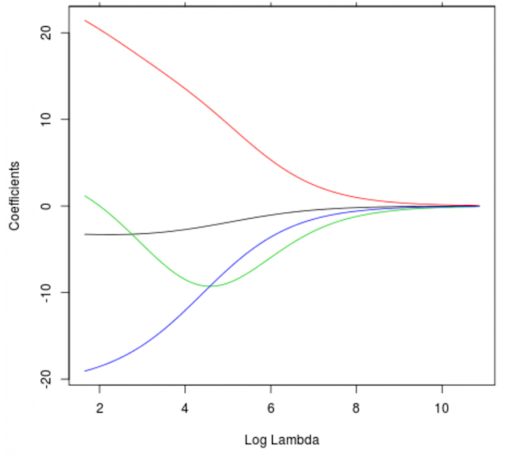

### Ridge Regression Algorithm:
1. **Start** with the dataset $(X,Y)$ with $n$ data points and $p$ features (i.e., $X$ is an $n \times p$ feature matrix, and $Y$ is the target vector of length $n$).
2. **Formulate the cost function**: Ridge regression minimizes the sum of squared errors (like ordinary linear regression) but adds a penalty term consisting of the sum of the squared coefficients $\beta \quad = \quad (\beta_1, \cdots, \beta_p)$, scaled by the regularization hyperparameter 
$$\lambda: \text{cost}(\beta) \quad = \quad \sum^n_{i = 1} (y_i - \hat{y} )^2 + \lambda \sum^p_{j=1} \beta^2_j$$
3. **Optimize the cost function** to find the best-fit coefficients $\beta$ using gradient descent or by solving the normal equations:
$$\beta \quad = \quad (X^{\top}X + \lambda I)^{-1} X^{\top}y$$

where $I$ is the identity matrix, and $X^{\top}$ is the transpose of the feature matrix. (Note that this is essentially the formula introduced in lesson 2.5, but adds $\lambda$ inside the parentheses.)

1. **Hyper Parameter Tuning:** Use techniques like grid search or random search, along with cross validation, to find the $\lambda$ that minimizes the overall cost function $cost(\beta)$. The optimal $\lambda$ is the one that results in the lowest cross-validated MSE.
2. **Output** the learned model coefficients and use them for prediction.

### Why does it work?
Ridge regression helps manage the bias-variance tradeoff. As $\lambda$ increases, the model's bias grows, but its variance decreases; lowering $\lambda$ reduces bias while increasing variance. The objective is to find the optimal $\lambda$ that strikes a balance between bias and variance, resulting in a model that generalizes well to new data. In essence, ridge regression deliberately introduces some bias to reduce variance and improve overall model stability.

There is a nice geometrical interpretation of ridge regression, showing the intersection of the two constraints, the MSE(black) and the penalty term (red). Since the penalty term is squared, we get a circle:

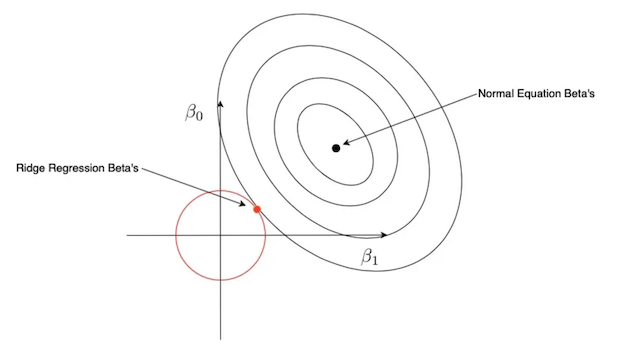

Now let’s take a look at a concrete example and demonstrate the workflow for ridge regression using `sklearn`. 